# Result anaysis of DENSER algorithm

In [3]:
import csv
import seaborn as sns
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2

In [35]:
# subpath = "cifar10/pop50_gen50_run30"
subpath = "MNIST/pop50_gen50_run4"

## 1. Generate plots of the results

In [5]:
import plot_results as pr
pr.read_results(subpath)

## Create grid

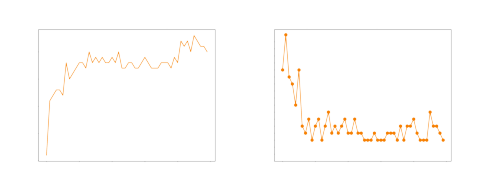

: 

In [76]:
import matplotlib.pyplot as plt

gen_acc_cifar = plt.imread("results/cifar10/pop50_gen50_run30/plot/generation_accuracy.png")
gen_len_cifar = plt.imread("results/cifar10/pop50_gen50_run30/plot/generation_net_len.png")


cm = 1/2.54  # centimeters in inches
fig, axes = plt.subplots(1, 2, figsize=(12*cm , 5*cm),  layout="constrained")


ax1 = axes[0]
ax1.axis('off')
ax1.imshow(gen_acc_cifar)

ax2 = axes[1]
ax2.axis('off')
ax2.imshow(gen_len_cifar)


plt.savefig('tmp/plot-cifar.png', dpi=600, transparent=True)

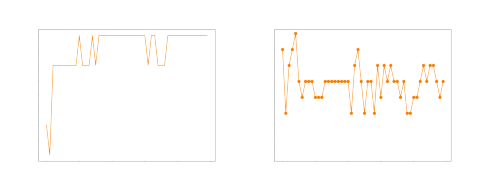

In [75]:
import matplotlib.pyplot as plt


gen_acc_mnist = plt.imread("results/MNIST/pop50_gen50_run4/plot/generation_accuracy.png")
gen_len_mnist = plt.imread("results/MNIST/pop50_gen50_run4/plot/generation_net_len.png")

cm = 1/2.54  # centimeters in inches
fig, axes = plt.subplots(1, 2, figsize=(12*cm , 5*cm),  layout="constrained")



ax3 = axes[0]
ax3.axis('off')
ax3.imshow(gen_acc_mnist)

ax4 = axes[1]

ax4.axis('off')
ax4.imshow(gen_len_mnist)

plt.savefig('tmp/plot-mnist.png', dpi=600, transparent=True)

## Create net

In [28]:
from src.dsge_level import *
from src.ga_level import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
layer1 = Layer(type = layer_type.CONV, c_out=48, param={'kernel_size': 5, 'stride': 1, 'padding': 'valid', 'bias': False})
layer2 = Layer(type = layer_type.BATCH_NORM, c_out=48, param={'eps': 8.14, 'momentum': 0.77})
layer3 = Layer(type = layer_type.ACTIVATION, c_out=48, param=activation.RELU)

layer4 = Layer(type =layer_type.POOLING, c_out=48, param={'pool_type': pool.MAX, 'kernel_size': 7, 'stride': 1, 'padding': 0})
layer5 = Layer(type = layer_type.CONV, c_out=48, param={'kernel_size': 5, 'stride': 1, 'padding': 'valid', 'bias': False})
layer6 = Layer(type = layer_type.BATCH_NORM, c_out=48, param={'eps': 5.34, 'momentum': 0.41})
layer7 = Layer(type = layer_type.ACTIVATION, c_out=48, param=activation.RELU)

layer8 = Layer(type=layer_type.LINEAR, c_out=100)
layer9 = Layer(type=layer_type.ACTIVATION, c_out=100, param=activation.SIGMOID)

layer10 = Layer(type=layer_type.LINEAR, c_out=10)
layer11 = Layer(type=layer_type.ACTIVATION, c_out=10, param=activation.SOFTMAX)

In [30]:
module1 = Module(module_types.FEATURES, layers=[layer1, layer2, layer3])
module2 = Module(module_types.FEATURES, layers=[layer4])
module3 = Module(module_types.FEATURES, layers=[layer5, layer6, layer7])
module4 = Module(module_types.CLASSIFICATION, layers=[layer8, layer9])
module5 = Module(module_types.LAST_LAYER, layers=[layer10, layer11])

In [33]:
netcode = Net_encoding(3,2,1,10,28,[module1, module2, module3, module4, module5])

In [34]:
netcode.print_dsge_level()

######## len: 5 ##########

 module: 0
module_types.FEATURES
(<layer_type.CONV: 1>, {'kernel_size': 5, 'stride': 1, 'padding': 'valid', 'bias': False}, {'in': 'not already defined', 'out': 48})
(<layer_type.BATCH_NORM: 4>, {'eps': 8.14, 'momentum': 0.77}, {'in': 'not already defined', 'out': 48})
(<layer_type.ACTIVATION: 2>, <activation.RELU: 0>, {'in': 'not already defined', 'out': 48})
param:  {'input_channels': 'not already defined', 'output_channels': 48}
output shape 24

 module: 1
module_types.FEATURES
(<layer_type.POOLING: 0>, {'pool_type': <pool.MAX: 0>, 'kernel_size': 7, 'stride': 1, 'padding': 0}, {'in': 'not already defined', 'out': 48})
param:  {'input_channels': 'not already defined', 'output_channels': 48}
output shape 18

 module: 2
module_types.FEATURES
(<layer_type.CONV: 1>, {'kernel_size': 5, 'stride': 1, 'padding': 'valid', 'bias': False}, {'in': 'not already defined', 'out': 48})
(<layer_type.BATCH_NORM: 4>, {'eps': 5.34, 'momentum': 0.41}, {'in': 'not already defin

In [39]:
netcode.draw(50, f"results/{subpath}")